In [86]:
# From now on, we assume that the following commands are issued at the beginning of each session:
# import key packages – required:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

In [3]:
pwd

'/home/aljoumani11/dsrBer_dir/dsrBer_env'

In [88]:
import pandas as pd



df = pd.read_csv('dengue_labels_train.csv')


In [89]:
df.head()

  city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [90]:
num_rows = len(df)
num_rows

1456

<AxesSubplot: >

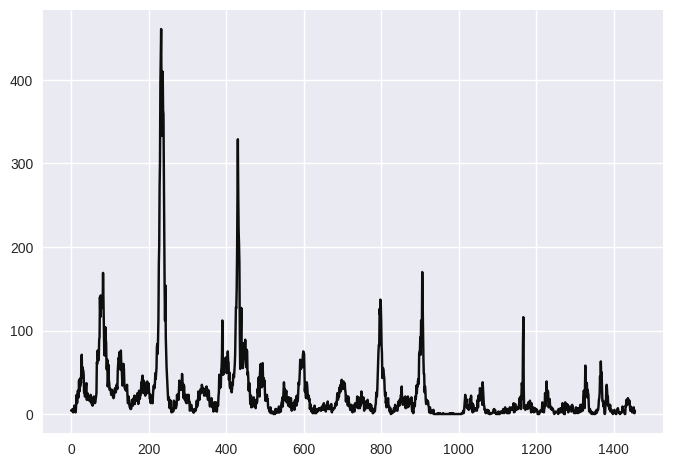

In [91]:
df['total_cases'].plot(kind='line')


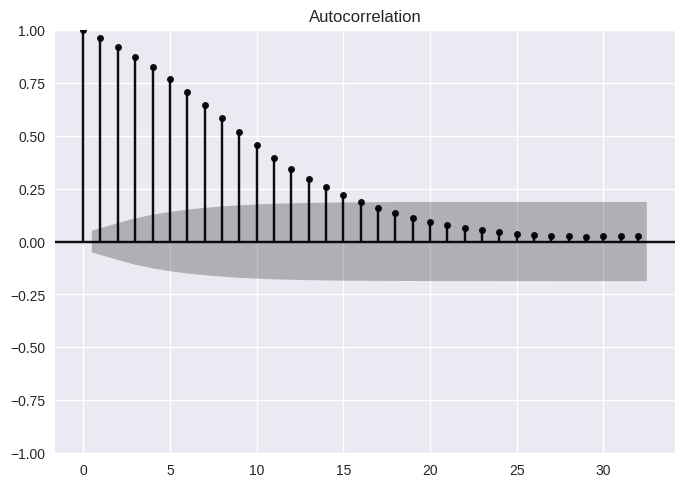

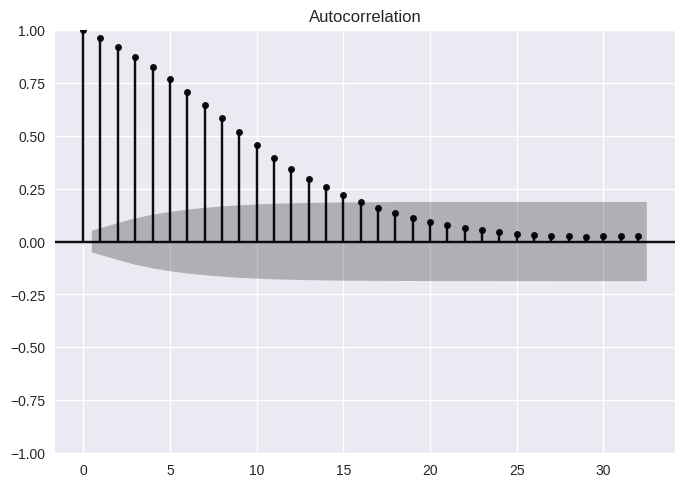

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['total_cases'])

## is stationary or not

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['total_cases'])
print("ADF test statistic: ", result[0])
print("p-value: ", result[1])

ADF test statistic:  -6.6232582356851655
p-value:  5.963285375798725e-09


## # plot the ACF and PACF

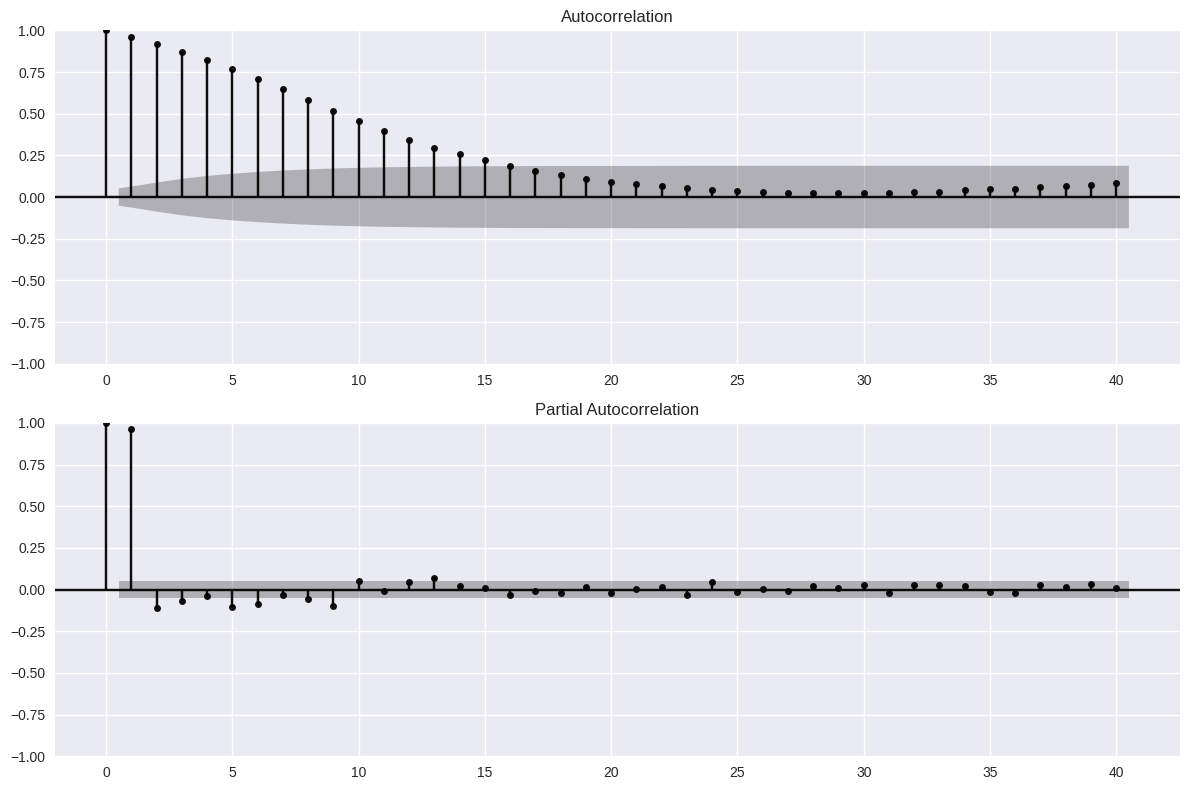

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf( df['total_cases'], lags=40, ax=ax1)
plot_pacf(df['total_cases'], lags=40, ax=ax2)
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

## # Build ARIMA model


In [54]:

import numpy as np
import statsmodels.tsa.arima.model as arima





In [70]:
model = arima.ARIMA(df['total_cases'], order=(1, 0, 1))
model_fit = model.fit()

In [80]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(model_fit.resid, lags=[5], return_df=True)

     lb_stat  lb_pvalue
5  29.160602   0.000022

In [100]:
# Split the data into training and testing sets
dd=df['total_cases']
#dd.head()
#len(dd)
# Split the data into training and testing sets
train_data = df[:-456]
test_data = df[-456:]


In [102]:
test_data.head()

     city  year  weekofyear  total_cases
1000   iq  2001          39            0
1001   iq  2001          40            0
1002   iq  2001          41            0
1003   iq  2001          42            0
1004   iq  2001          43            0

In [115]:

# Fit the ARIMA model to the training data
model = ARIMA(train_data['total_cases'], order=(1,0,1))
model_fit = model.fit()




In [120]:
# Make predictions on the test data
predictions = model_fit.forecast(steps= 456)



In [125]:
num_rows = len(predictions)
num_rows

456

In [126]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_data['total_cases'], predictions))
print('The Root Mean Squared Error is:', rmse)

The Root Mean Squared Error is: 24.782514028250358


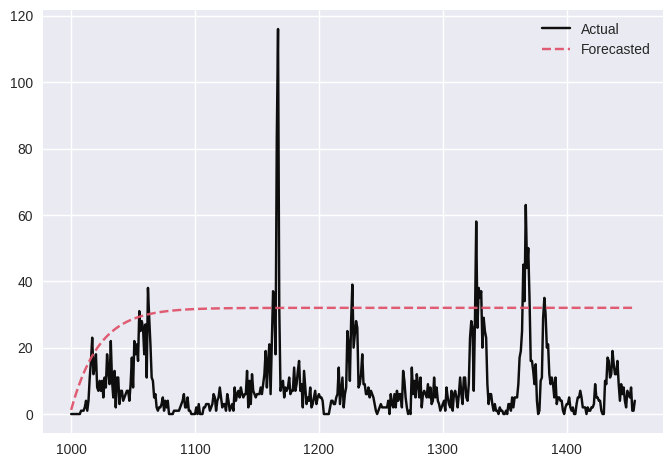

In [124]:
import matplotlib.pyplot as plt

plt.plot(test_data['total_cases'], label='Actual')
plt.plot(predictions, label='Forecasted')
plt.legend()
plt.show()